# 產品銷售分析
### 目標
掌握商品銷售狀況來提高自己銷售業績：

1. 商品銷售概況
    - 各商品銷量/各商品銷售額分佈/月銷售額/各商品每月銷量分佈/每筆訂單客單價  
    
2. 商品上架優先順序策略
    - 引流款 (低價，高需求)
    - 地雷款 (低價，低需求)
    - 價值款 (高價，低需求)
    - 金雞款（高價，高需求）  
     
3. 未來行銷規劃建議
    - 廣告投放或優惠推播時間建議/常一起購買的商品

### 導入工具包 / 資料集

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

import matplotlib.pyplot as plt
%matplotlib inline

#### 將1-12月的銷售資料合成一個CSV檔

In [2]:
# let's make a list compreension for all the data in the folder
files = [file for file in os.listdir('/kaggle/input/sales-product-data')] 

# let's make a pandas DataFrame
all_months_data = pd.DataFrame()

# makes a loop for concat the data
for file in files:
    data = pd.read_csv("/kaggle/input/sales-product-data/" + file)
    all_months_data = pd.concat([all_months_data, data])

# export all data to csv    
all_months_data.to_csv("/kaggle/working/all_data.csv", index=False)

In [3]:
sales_data = pd.read_csv('all_data.csv') 
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


從`info()`，可看到此資料集中含有6欄，186305筆商品資料

### 資料清洗

In [5]:
sales_data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [6]:
# 空值處理
print('nan value in each columns:')
missing_values_count = sales_data.isnull().sum()
print(missing_values_count)

nan value in each columns:
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [7]:
# 空值佔整體資料比例
total_cells = np.product(sales_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing / total_cells) * 100
print(f'percent_missing:{percent_missing:.2f}%')

percent_missing:0.29%


In [8]:
# 刪除空值
sales_data = sales_data.dropna()

#check
print(sales_data.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [9]:
# future warning! ValueError: invalid literal for int() with base 10: 'Or'開頭
"Clean Future Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']

#### 轉換欄位型態&增加欄位以利後續分析

In [10]:
from datetime import datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], errors = 'coerce')
sales_data['Purchase Address'] = sales_data['Purchase Address'].astype(str)
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype(int)
sales_data['Price Each'] = sales_data['Price Each'].astype(float)

In [11]:
sales_data['City'] = sales_data['Purchase Address'].str.split(',').str[1].astype(str)
sales_data['Total Price'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data['Order_month'] = sales_data['Order Date'].dt.month
sales_data['Order_hour'] = sales_data['Order Date'].dt.hour

In [12]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price,Order_month,Order_hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",Seattle,23.98,8,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",Dallas,99.99,8,15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",Portland,700.00,8,14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",Los Angeles,7.68,8,20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",New York City,7.68,8,19


### 資料觀察

In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   City              185950 non-null  object        
 7   Total Price       185950 non-null  float64       
 8   Order_month       185950 non-null  int64         
 9   Order_hour        185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 15.6+ MB


In [14]:
sales_data.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
City                     9
Total Price             54
Order_month             12
Order_hour              24
dtype: int64

原資料集含有6欄，186850筆資料，再處理完空值、異常值以及新增後續需使用到的分析欄位後，目前資料集含有10欄位，185950筆商品資料。

In [15]:
sales_data.describe()

,Quantity Ordered,Price Each,Total Price,Order_month,Order_hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917,7.059140,14.413305
std,0.442793,332.731330,332.919771,3.502996,5.423416
min,1.000000,2.990000,2.990000,1.000000,0.000000
25%,1.000000,11.950000,11.950000,4.000000,11.000000
50%,1.000000,14.950000,14.950000,7.000000,15.000000
75%,1.000000,150.000000,150.000000,10.000000,19.000000
max,9.000000,1700.000000,3400.000000,12.000000,23.000000


## 資料分析

### 一、商品銷售概況
#### 1.各商品銷量

In [16]:
items = sales_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean', 'Total Price': 'sum'})
items = items.sort_values(by = 'Quantity Ordered', ascending = False)
items

,Quantity Ordered,Price Each,Total Price
Product,,,
AAA Batteries (4-pack),31017,2.99,92740.83
AA Batteries (4-pack),27635,3.84,106118.40
USB-C Charging Cable,23975,11.95,286501.25
Lightning Charging Cable,23217,14.95,347094.15
Wired Headphones,20557,11.99,246478.43
Apple Airpods Headphones,15661,150.00,2349150.00
Bose SoundSport Headphones,13457,99.99,1345565.43
27in FHD Monitor,7550,149.99,1132424.50
iPhone,6849,700.00,4794300.00


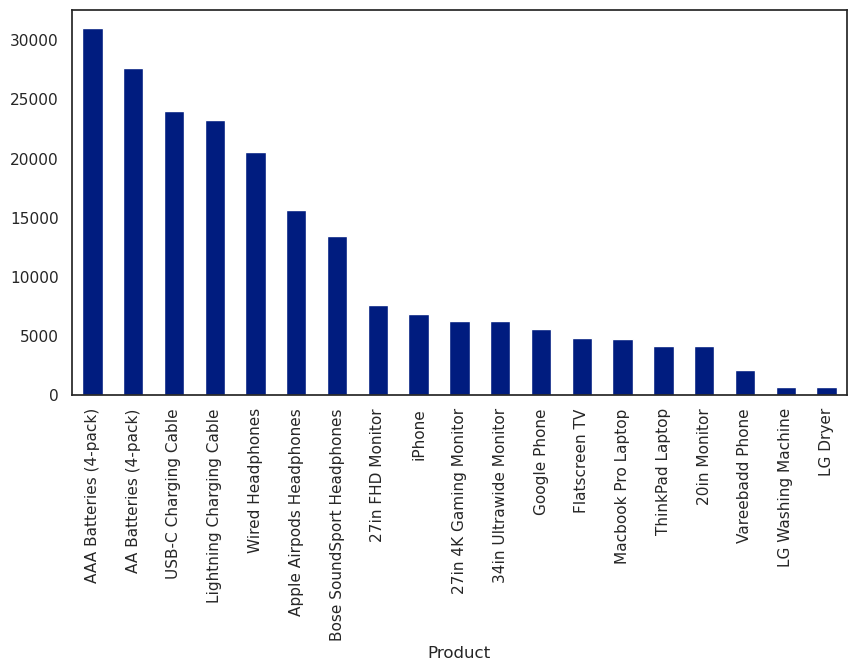

In [17]:
ax = items['Quantity Ordered'].plot.bar(figsize = (10,5))

銷量Top3的商品為：  
AAA Batteries (4-pack)  
AA Batteries (4-pack)  
USB-C Charging Cable   

銷量最差的商品為：  
LG Washing Machine  
LG Dryer

#### 2.各商品售價分佈
由圖可以看到 Macbook Pro Laptop、iPhone、ThinkPad Laptop，此三樣商品雖然銷售量非最高，但為高單價商品，因此對整體營收貢獻度大

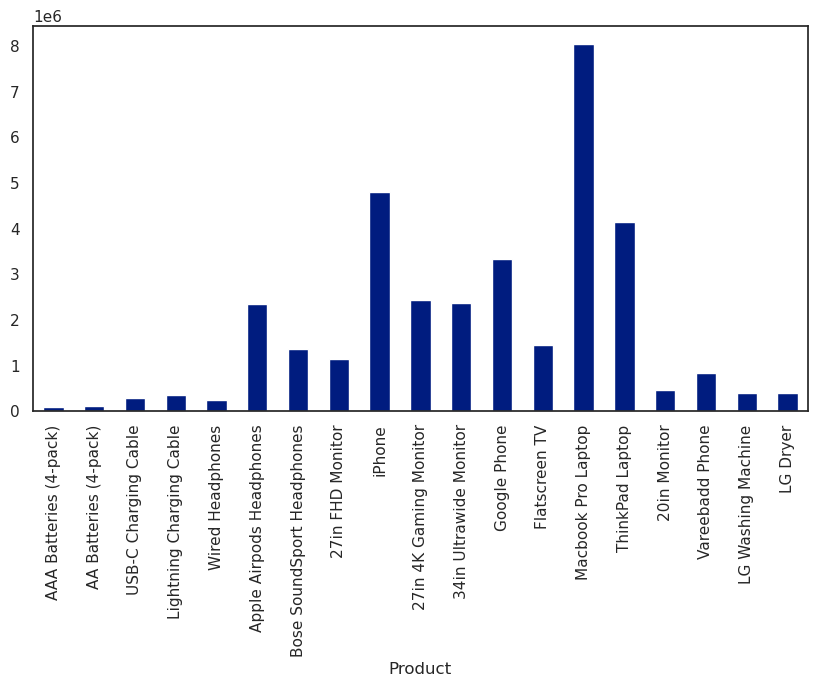

In [18]:
ax = items['Total Price'].plot.bar(figsize = (10,5))

#### 3.月銷售額

<AxesSubplot:xlabel='Order_month'>

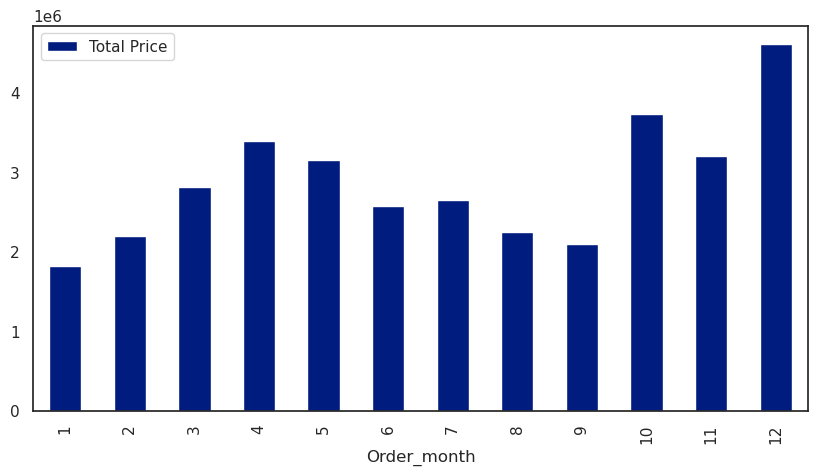

In [19]:
monthlysales = sales_data.groupby('Order_month').agg({'Total Price': 'sum'})
monthlysales.plot.bar(figsize = (10,5))

整體上年底銷量比較好，可能是因為快過節的緣故

#### 4.各商品每月銷量分佈

In [20]:
itemsmonthly = sales_data.groupby(['Product','Order_month']).agg({'Quantity Ordered':'sum', 'Total Price':'sum'}).reset_index()
itemsmonthly

,Product,Order_month,Quantity Ordered,Total Price
0,20in Monitor,1,218,23977.82
1,20in Monitor,2,246,27057.54
2,20in Monitor,3,326,35856.74
3,20in Monitor,4,393,43226.07
4,20in Monitor,5,341,37506.59
...,...,...,...,...
223,iPhone,8,439,307300.00
224,iPhone,9,397,277900.00
225,iPhone,10,716,501200.00
226,iPhone,11,665,465500.00


<AxesSubplot:xlabel='Order_month', ylabel='Quantity Ordered'>

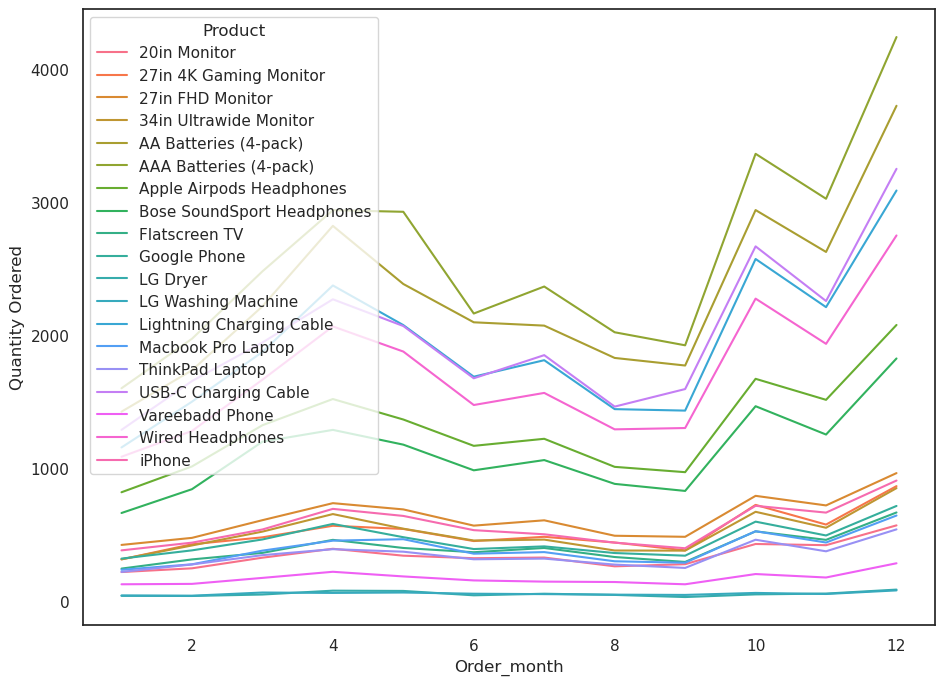

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
sns.lineplot(data = itemsmonthly, x = 'Order_month',y = 'Quantity Ordered', hue = 'Product', ax = ax)

由上圖可以發現，每個種類商品的月銷量趨勢很相似

#### 5.每筆訂單客單價

array([[<AxesSubplot:title={'center':'Total Price'}>]], dtype=object)

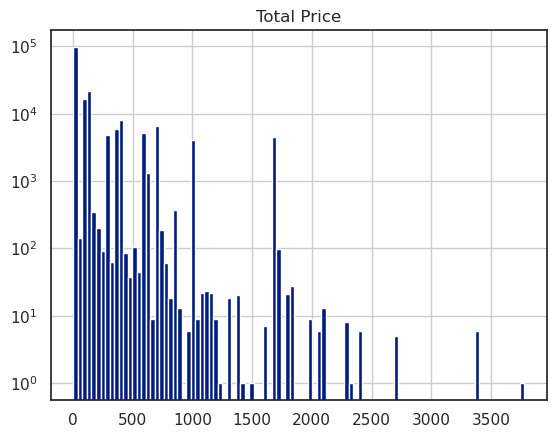

In [22]:
orders = sales_data.groupby('Order ID').agg({'Total Price':'sum'}).sort_values('Total Price').reset_index()
orders.hist(bins = 100, log = True)

In [23]:
orders['Total Price'].describe()

count    178437.000000
mean        193.300918
std         341.274261
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3779.990000
Name: Total Price, dtype: float64

可以發現每筆訂單客單價大多落在0-1000美元區間；少數高於2000美元以上

### 二、商品上架優先順序策略
上架順序：價值款和引流款的優先順序可依比例調整，但盡量避免先上地雷區的產品。  

#### 1.引流款 (低價，高需求): 
> 引流款的意義在於衝評價或是利用免運門檻來提高客單價進行收單。

In [24]:
# 售價低，銷量高
first = sales_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean','Total Price':'sum'})
first = first.sort_values(['Quantity Ordered','Price Each'], ascending =[False,True])
first.head(3)

,Quantity Ordered,Price Each,Total Price
Product,,,
AAA Batteries (4-pack),31017,2.99,92740.83
AA Batteries (4-pack),27635,3.84,106118.40
USB-C Charging Cable,23975,11.95,286501.25


#### 2. 地雷款 (低價，低需求)
> 地雷款基本上此區商品不是主要營收來源，上架商品順序的話，會建議盡量先避開此區商品。

In [25]:
# 售價低，銷量低
two = sales_data.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each':'mean','Total Price':'sum'})
two = two.sort_values(['Quantity Ordered','Price Each'])
two.head(3)

,Quantity Ordered,Price Each,Total Price
Product,,,
LG Dryer,646,600.0,387600.0
LG Washing Machine,666,600.0,399600.0
Vareebadd Phone,2068,400.0,827200.0


#### 3. 價值款 (高價，低需求):
> 價值款產品需搭配銷售數量及售價交叉看，如果是初期賣家建議在此區挑選銷售數量較多的先上架，兼顧衝評價

In [26]:
# 售價高，銷量低
three = sales_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean','Total Price':'sum'})
three = three.sort_values(['Price Each','Quantity Ordered'], ascending = [False,True])
three.head(3)

,Quantity Ordered,Price Each,Total Price
Product,,,
Macbook Pro Laptop,4728,1700.00,8037600.0
ThinkPad Laptop,4130,999.99,4129958.7
iPhone,6849,700.00,4794300.0


#### 4. 金雞款（高價，高需求）

In [27]:
# 售價高，銷量高
final = sales_data.groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'sum','Total Price':'sum'})
final.sort_values(['Price Each','Quantity Ordered'], ascending = False)
final.head(3)

,Quantity Ordered,Price Each,Total Price
Product,,,
20in Monitor,4129,451068.99,454148.71
27in 4K Gaming Monitor,6244,2429637.70,2435097.56
27in FHD Monitor,7550,1125974.93,1132424.50


### 三、未來行銷規劃建議

#### 1.廣告投放或優惠推播時間建議

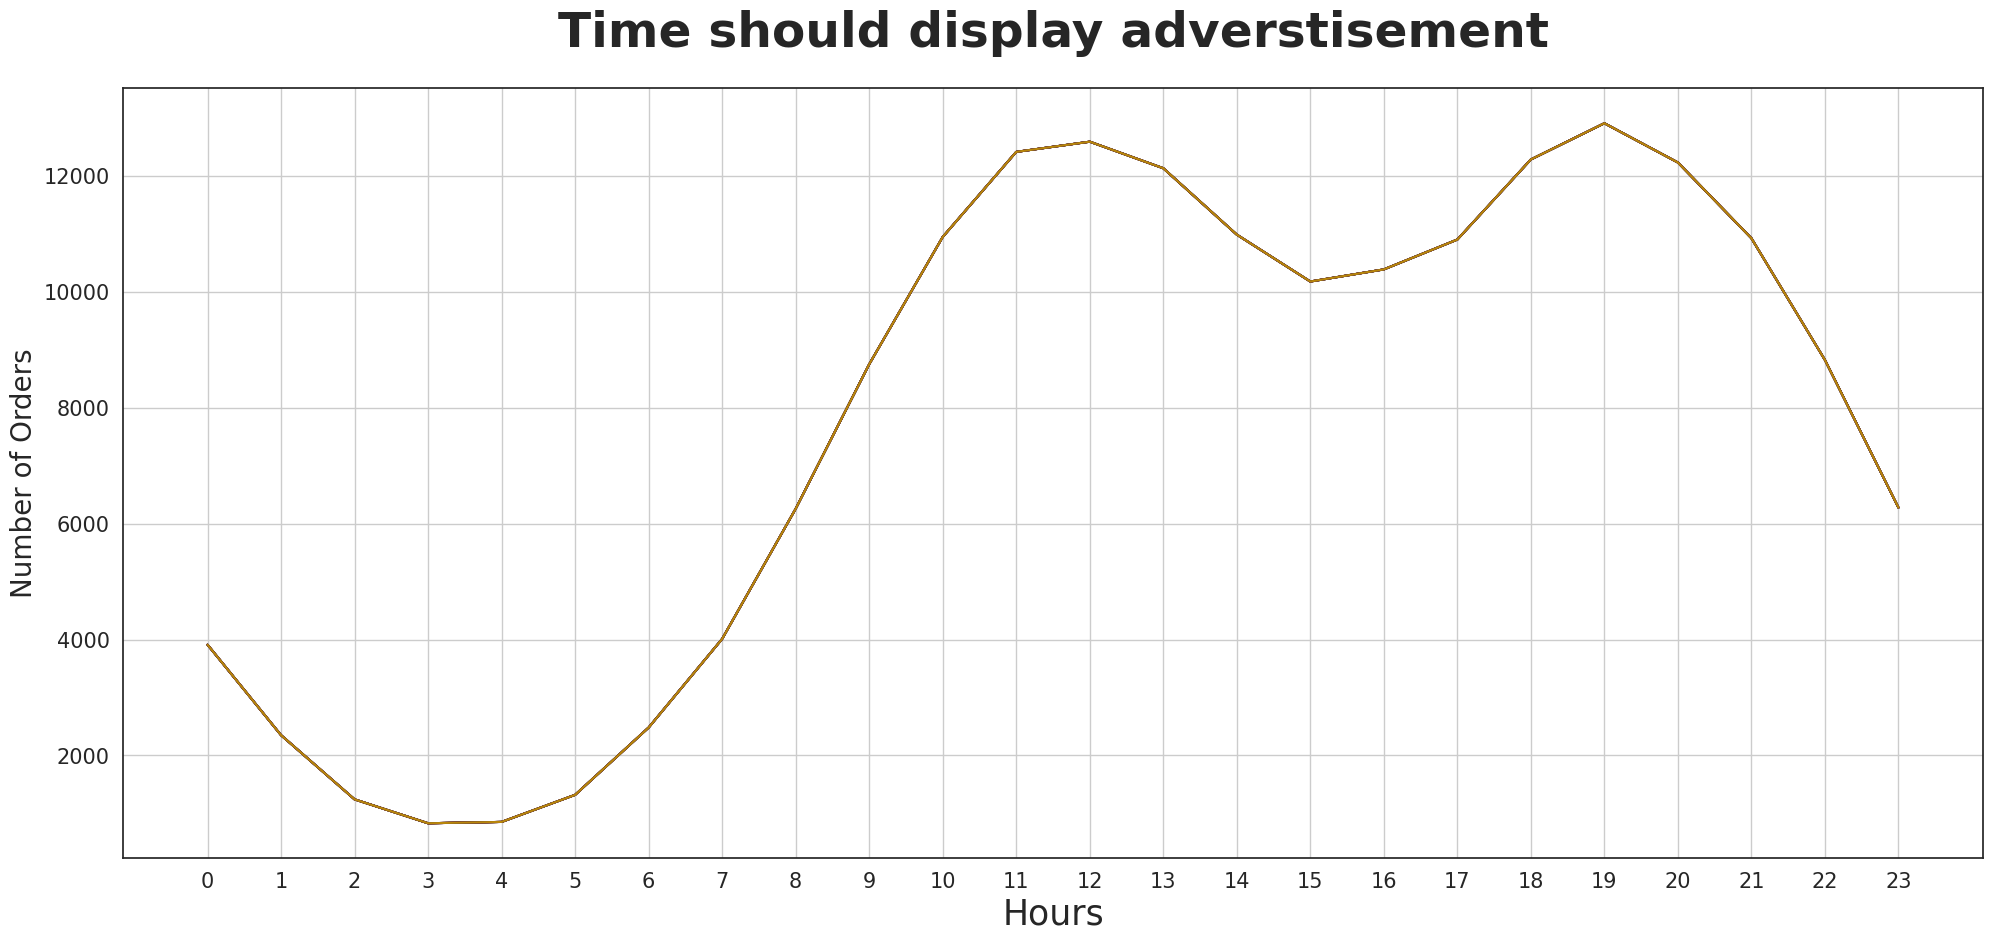

In [28]:
hours = [hour for hour, df in sales_data.groupby('Order_hour')]
#hours

plt.figure(figsize = (24,10))
plt.plot(hours, sales_data.groupby(['Order_hour']).count()) # x-axis, data
plt.grid(True)
plt.title('Time should display adverstisement', weight = 'bold', fontsize = 35, pad = 30)
plt.xlabel('Hours', fontsize = 25, loc = 'center')
plt.xticks(ticks = hours, fontsize = 15)
plt.ylabel('Number of Orders', fontsize = 20)
plt.yticks(fontsize = 15);

由圖可以觀察到客戶主要消費的時間落在中午11-12點及晚上7-8點，可以嘗試於這兩個時間點投放廣告或設定優惠推撥，刺激消費。

#### 2.常一起購買的商品

In [29]:
from itertools import combinations
from collections import Counter

# drop 'order id' duplicated()
data = sales_data[sales_data['Order ID'].duplicated(keep = False)]

# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

# make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()

# create a new variable for Counter
count = Counter()

# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# and make another for loop    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


由上可以發現幾樣商品互相具有關聯性，像是：
1. 手機類產品+數據/充電線
2. 手機類產品+耳機
3. 數據/充電線+耳機  

以上商品很適合A+B加價購或當組合商品一起賣，抑或是設定成購物車推薦